# Convolutional Neural Network Implemntation

## 1 Starter Code and EDA
Below is started code provided by the IrinaStatsLab for loading the Hall dataset and some data exploration on that dataset

In [1]:
# all from original example.ipynb from IrinaStatsLab, but with a different dataset
import yaml
from data_formatter.base import DataFormatter

# load config file
dataset = 'hall' # changed from 'weinstock' dataset
with open(f'./config/{dataset}.yaml', 'r') as f:
    config = yaml.safe_load(f)
# create data formatter: loads the data and performs the pre-processing
formatter = DataFormatter(config)

--------------------------------
Loading column definition...
Checking column definition...
Loading data...
Dropping columns / rows...
Checking for NA values...
Setting data types...
Dropping columns / rows...
Encoding data...
	Updated column definition:
		id: REAL_VALUED (ID)
		time: DATE (TIME)
		gl: REAL_VALUED (TARGET)
		Age: REAL_VALUED (STATIC_INPUT)
		BMI: REAL_VALUED (STATIC_INPUT)
		A1C: REAL_VALUED (STATIC_INPUT)
		FBG: REAL_VALUED (STATIC_INPUT)
		ogtt.2hr: REAL_VALUED (STATIC_INPUT)
		insulin: REAL_VALUED (STATIC_INPUT)
		hs.CRP: REAL_VALUED (STATIC_INPUT)
		Tchol: REAL_VALUED (STATIC_INPUT)
		Trg: REAL_VALUED (STATIC_INPUT)
		HDL: REAL_VALUED (STATIC_INPUT)
		LDL: REAL_VALUED (STATIC_INPUT)
		mean_glucose: REAL_VALUED (STATIC_INPUT)
		sd_glucose: REAL_VALUED (STATIC_INPUT)
		range_glucose: REAL_VALUED (STATIC_INPUT)
		min_glucose: REAL_VALUED (STATIC_INPUT)
		max_glucose: REAL_VALUED (STATIC_INPUT)
		quartile.25_glucose: REAL_VALUED (STATIC_INPUT)
		median_glucose: REAL_VA

Once the data is loaded and pre-processed, we can access the underlying tables via the following set of commands. 

In [2]:
# Full unscaled data preview
formatter.data.head()

,time,id,gl,Age,BMI,A1C,FBG,ogtt.2hr,insulin,hs.CRP,...,Insulin_rate_dd,perc_cgm_prediabetic_range,perc_cgm_diabetic_range,SSPG,time_year,time_month,time_day,time_hour,time_minute,id_segment
0,2014-02-03 03:42:00,0.0,93.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,3.0,42.0,0
1,2014-02-03 03:47:00,0.0,93.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,3.0,47.0,0
2,2014-02-03 03:52:00,0.0,93.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,3.0,52.0,0
3,2014-02-03 03:57:00,0.0,95.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,3.0,57.0,0
4,2014-02-03 04:02:00,0.0,96.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,4.0,2.0,0


In [3]:
# train data, scaled
formatter.train_data.head()

,time,id,gl,Age,BMI,A1C,FBG,ogtt.2hr,insulin,hs.CRP,...,Insulin_rate_dd,perc_cgm_prediabetic_range,perc_cgm_diabetic_range,SSPG,time_year,time_month,time_day,time_hour,time_minute,id_segment
0,2014-02-03 03:42:00,0.0,93.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,3.0,42.0,0
1,2014-02-03 03:47:00,0.0,93.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,3.0,47.0,0
2,2014-02-03 03:52:00,0.0,93.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,3.0,52.0,0
3,2014-02-03 03:57:00,0.0,95.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,3.0,57.0,0
4,2014-02-03 04:02:00,0.0,96.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,4.0,2.0,0


In [4]:
# Out-of-distribution test data preview, scaled (OOD meaning test set differs significantly from training)
formatter.test_data[formatter.test_data.index.isin(formatter.test_idx_ood)].head()

,time,id,gl,Age,BMI,A1C,FBG,ogtt.2hr,insulin,hs.CRP,...,Insulin_rate_dd,perc_cgm_prediabetic_range,perc_cgm_diabetic_range,SSPG,time_year,time_month,time_day,time_hour,time_minute,id_segment
3540,2015-04-02 13:33:00,2.0,129.0,50.0,27.299999,5.2,91.0,121.0,4.0,4.4,...,-1.0,0.071429,0.001544,75.0,2015.0,4.0,2.0,13.0,33.0,5
3541,2015-04-02 13:38:00,2.0,131.0,50.0,27.299999,5.2,91.0,121.0,4.0,4.4,...,-1.0,0.071429,0.001544,75.0,2015.0,4.0,2.0,13.0,38.0,5
3542,2015-04-02 13:43:00,2.0,132.0,50.0,27.299999,5.2,91.0,121.0,4.0,4.4,...,-1.0,0.071429,0.001544,75.0,2015.0,4.0,2.0,13.0,43.0,5
3543,2015-04-02 13:48:00,2.0,137.0,50.0,27.299999,5.2,91.0,121.0,4.0,4.4,...,-1.0,0.071429,0.001544,75.0,2015.0,4.0,2.0,13.0,48.0,5
3544,2015-04-02 13:53:00,2.0,135.0,50.0,27.299999,5.2,91.0,121.0,4.0,4.4,...,-1.0,0.071429,0.001544,75.0,2015.0,4.0,2.0,13.0,53.0,5


In [5]:
# In-distribution test data preview
formatter.test_data[~formatter.test_data.index.isin(formatter.test_idx_ood)].head()

,time,id,gl,Age,BMI,A1C,FBG,ogtt.2hr,insulin,hs.CRP,...,Insulin_rate_dd,perc_cgm_prediabetic_range,perc_cgm_diabetic_range,SSPG,time_year,time_month,time_day,time_hour,time_minute,id_segment
1434,2015-04-01 11:13:00,0.0,87.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2015.0,4.0,1.0,11.0,13.0,2
1435,2015-04-01 11:18:00,0.0,87.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2015.0,4.0,1.0,11.0,18.0,2
1436,2015-04-01 11:23:00,0.0,89.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2015.0,4.0,1.0,11.0,23.0,2
1437,2015-04-01 11:28:00,0.0,92.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2015.0,4.0,1.0,11.0,28.0,2
1438,2015-04-01 11:33:00,0.0,93.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2015.0,4.0,1.0,11.0,33.0,2


In [6]:
# get num of entries for each id in the training data
train_counts = formatter.train_data.groupby('id').count().sort_values('id').iloc[:, 0:1].rename(columns={'time': 'num_test_entries'})

# add max time from training to train_counts
train_counts['max_time'] = formatter.train_data.groupby('id').max().sort_values('id')['time']

# join testing data on ids
test_counts = formatter.test_data.groupby('id').count().sort_values('id').iloc[:, 0:1].rename(columns={'time': 'num_test_entries'})
test_counts['min_time'] = formatter.test_data.groupby('id').min().sort_values('id')['time']

train_counts = train_counts.join(test_counts, how='outer', lsuffix='_train', rsuffix='_test')
train_counts.head()

,num_test_entries_train,max_time,num_test_entries_test,min_time
id,,,,
0.0,1386.0,2015-04-01 07:08:00,336,2015-04-01 11:13:00
1.0,1386.0,2015-11-29 04:37:00,336,2015-11-29 08:42:00
2.0,NaN,NaT,1769,2015-04-02 13:33:00
3.0,1400.0,2016-01-18 09:33:00,336,2016-01-18 13:38:00
4.0,740.0,2016-01-31 10:02:00,208,2016-02-02 12:37:00


In [7]:
# Checking the number of individuals in the training and test sets
id_test = formatter.test_data[~formatter.test_data.index.isin(formatter.test_idx_ood)]
ood_test = formatter.test_data[formatter.test_data.index.isin(formatter.test_idx_ood)]
print(f'Number of individuals in training set: {formatter.train_data["id"].nunique()}')
print(f'Number of individuals in in-distribution test set: {id_test["id"].nunique()}')
print(f'Number of individuals in out-of-distribution test set: {ood_test["id"].nunique()}')

Number of individuals in training set: 50
Number of individuals in in-distribution test set: 50
Number of individuals in out-of-distribution test set: 6


In [8]:
# Checking train/test split ratio
ratio = id_test.size / formatter.train_data.size
print(f'Train/Test split ratio: {ratio:.2f}')
# Checking Raw Amounts
print(f'Train data size: {formatter.train_data.size}')
print(f'Test data size: {id_test.size}')

Train/Test split ratio: 0.26
Train data size: 3497816
Test data size: 924952


In [9]:
# Getting the mean, std, min, and max of glucose values in the data
formatter.data['gl'].describe()

count    93384.000000
mean       102.418594
std         23.194979
min         40.000000
25%         87.000000
50%         99.000000
75%        114.000000
max        303.000000
Name: gl, dtype: float64

In [10]:
# Getting the descriptive statistics the range and standard
summary_data = formatter.data.groupby('id')['gl'].describe()
print(f"Minimum gl. std: {summary_data['std'].min()}")
print(f"Maximum gl. std: {summary_data['std'].max()}")
print(f"Average gl. std: {summary_data['std'].mean()}")
print(f"Minimum gl. range: {(summary_data['max'] - summary_data['min']).min()}")
print(f"Maximum gl. range: {(summary_data['max'] - summary_data['min']).max()}")
print(f"Average gl. range: {(summary_data['max'] - summary_data['min']).mean()}")


Minimum gl. std: 9.618169784545898
Maximum gl. std: 39.289127349853516
Average gl. std: 19.11488515990121
Minimum gl. range: 66.0
Maximum gl. range: 230.0
Average gl. range: 122.06071424484253


In [11]:
# Get each column that doesn't change over time
static_columns = formatter.data.columns.difference(['gl', 'time'])
# Get the static data grouped by id
static_data = formatter.data.groupby('id')[static_columns].first()
display(static_data.columns)

Index(['A1C', 'Age', 'BMI', 'FBG', 'HDL', 'Height', 'IQR', 'Insulin_rate_dd',
       'LDL', 'SSPG', 'Tchol', 'Trg', 'Weight', 'coef_variation', 'diagnosis',
       'distance_traveled', 'distance_traveled_normByDays', 'freq_low',
       'freq_moderate', 'freq_severe', 'glucotype', 'hs.CRP', 'id',
       'id_segment', 'insulin', 'j_index', 'mage', 'max_glucose', 'max_slope',
       'mean_glucose', 'mean_slope', 'median_glucose', 'min_glucose', 'modd',
       'numGE', 'numGE_normByDays', 'number_Random140',
       'number_Random140_normByDays', 'number_Random200',
       'number_Random200_normByDays', 'ogtt.2hr', 'perc_cgm_diabetic_range',
       'perc_cgm_prediabetic_range', 'percent_below.80', 'quartile.25_glucose',
       'quartile.75_glucose', 'range_glucose', 'sd_glucose', 'se_glucose_mean',
       'time_day', 'time_hour', 'time_minute', 'time_month', 'time_year'],
      dtype='object')

In [12]:
# Getting information on age
formatter.data.groupby('id')['Age'].mean().describe()

count    56.000000
mean     48.732143
std      13.914664
min      25.000000
25%      34.750000
50%      51.000000
75%      60.000000
max      76.000000
Name: Age, dtype: float64

In [13]:
# Getting information on age
formatter.data.groupby('id')['BMI'].mean().describe()

count    56.000000
mean     26.706964
std       4.738729
min      19.000000
25%      23.799999
50%      26.299999
75%      28.500000
max      40.400002
Name: BMI, dtype: float64

## 2 Initial Simple Model
Below, is an initial CNN model designed as a simple baseline for testing other models

In [14]:
# Group by patient ID
training_data = formatter.train_data.copy()

In [15]:
import numpy as np


# Defining a function to create training sequences for the CNN model
def create_sequences(data, sequence_length, target_offset=6):
    X, y = [], []

    for _, group in data.groupby('id'):
        group = group.reset_index(drop=True)
        gl_series = group['gl'].values
        
        for i in range(len(gl_series) - sequence_length - target_offset + 1):
            X.append(gl_series[i:i+sequence_length])
            y.append(gl_series[i + sequence_length:i + sequence_length + target_offset])


    X = np.array(X)
    y = np.array(y)
    X = X[..., np.newaxis]  # add channel dimension for Conv1D

    return X, y

In [16]:
# Parameters
sequence_length = 60  # past 12 time steps (e.g. 1-min intervals for 12 minutes)
target_offset = 6     # predict 5 minutes ahead

X, y = create_sequences(training_data, sequence_length)

In [17]:
# Previewing the shape of the created sequences to confirm correctness
X.shape, y.shape

((59211, 60, 1), (59211, 6))

In [18]:
# Defining the simple CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, Dense, Input

model = Sequential([
    Input((sequence_length, 1)),  # Initial dense layer
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    GlobalMaxPooling1D(), # Equivalent to flatten
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(target_offset)  # Regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [19]:
# Fitting the simple model
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 855.0702 - mae: 20.3382 - val_loss: 238.3478 - val_mae: 11.3636
Epoch 2/10
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 381.0420 - mae: 14.1510 - val_loss: 415.9236 - val_mae: 16.8375
Epoch 3/10
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 351.0216 - mae: 13.7536 - val_loss: 221.9429 - val_mae: 11.2565
Epoch 4/10
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 321.1025 - mae: 13.2406 - val_loss: 231.3035 - val_mae: 11.6527
Epoch 5/10
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 313.3814 - mae: 13.0849 - val_loss: 228.6853 - val_mae: 11.5734
Epoch 6/10
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 295.6625 - mae: 12.7346 - val_loss: 214.8917 - val_mae: 11.0390
Epoch 7/10
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 300.6068 - mae: 12.8673 - val_loss: 211.7556 - val_mae: 10.7701
Epoch 8/10
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 294.0120 - mae: 12.7036 - val_loss: 245.1235 - val_mae: 

In [20]:
# Defining the test data nad forcing it to be in-distribution
test_data = formatter.test_data[~formatter.test_data.index.isin(formatter.test_idx_ood)]
X_test, y_test = create_sequences(test_data, sequence_length, target_offset)

In [21]:
# Predicting and getting initial loss (MSE)
prediction = model.predict(X_test)
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 278.6834 - mae: 12.2395
Test loss: [271.2510070800781, 11.957265853881836]


In [22]:
# Confirming shapes of the test data and predictions
X_test[0].shape, y_test[0].shape, prediction[0].shape

((60, 1), (6,), (6,))

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a function to visualize predictions
def visualize_predictions(X, y_true, y_pred, index=0, title='CNN Time Series Prediction'):
    plt.figure(figsize=(10, 4))
    plt.plot([i for i in range(X[index].shape[0])], np.reshape(X[index], (60, )), label='X', marker='o')
    plt.plot([i for i in range(60, 60 + y_true[index].shape[0])], y_true[index], label='True', marker='x')
    plt.plot([i for i in range(60, 60 + y_pred[index].shape[0])], y_pred[index], label='Pred', marker='^')
    plt.title(title)
    plt.xlabel('Time Step')
    plt.ylabel('Gl/mg')
    plt.legend()
    plt.grid(True)
    plt.show()

In [24]:
# Getting the more statistics for the test data
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)**0.5
r2 = r2_score(y_test, prediction)
print("MAE of test data:", mae)
print("RMSE of test data:", mse)
print("R2 of test data:", r2)

MAE of test data: 11.957266807556152
RMSE of test data: 16.46967928325744
R2 of test data: 0.5237401127815247


### 2.1 Model Predictions Visualized

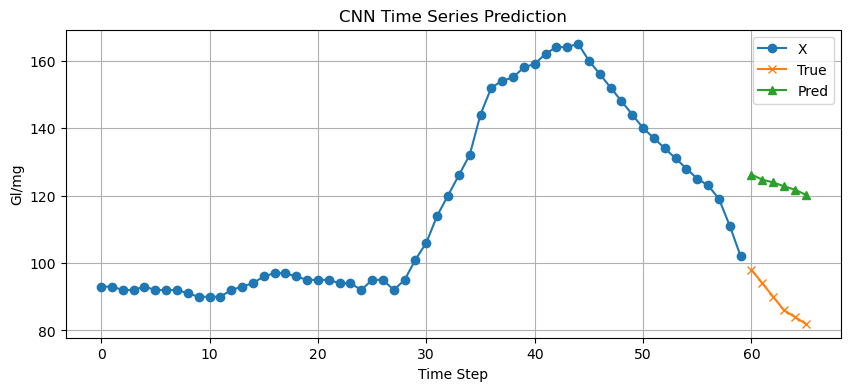

In [25]:
visualize_predictions(X_test, y_test, prediction, index=35)

## 3 Baseline 0 Change Model
This "model" will always just predict no change since the last point. It will be used as a baseline. 

In [26]:
# getting static predictions
def create_static_predictions(X, target_offset=6):
    y_pred_static = []
    for i in range(X_test.shape[0]):
        static_prediction = np.full((target_offset, ), X[i, -1, 0])
        y_pred_static.append(static_prediction)

    return np.array(y_pred_static)

y_pred_static = create_static_predictions(X_test, target_offset)


MAE of test data: 6.124415874481201
RMSE of test data: 10.169615229376882
R2 of test data: 0.8184900879859924


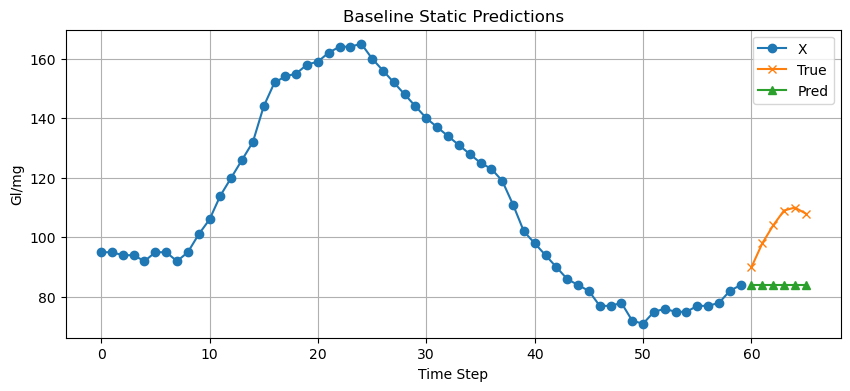

In [27]:
# Analyzign the quality of the static predictions
mae = mean_absolute_error(y_test, y_pred_static)
mse = mean_squared_error(y_test, y_pred_static)
r2 = r2_score(y_test, y_pred_static)
print("MAE of test data:", mae)
print("RMSE of test data:", mse**0.5)
print("R2 of test data:", r2)
# Visualizing the static predicitons
visualize_predictions(X_test, y_test, y_pred_static, index=55, title='Baseline Static Predictions')

All metrics increased under static prediction, so our model is very bad right now.

## 4 Multi-Input Model
This model focuses on leveraging data processing a model adjustments to minimize the loss. Data is changed to predict BG change rather than raw levels. The models is changed to take a split input of the biometric and summary data of a participant and the time series BG levels.

In [28]:
from sklearn.preprocessing import StandardScaler

# Function to split dynamic and static inputs
def split_dynamic_static_inputs(df, sequence_length, time_col='time', id_col='id', static_cols=None):
    # Getting dynamic and static columns
    variable_cols = df.columns.difference([id_col, time_col])
    unique_counts = df.groupby(id_col)[variable_cols].nunique()
    if static_cols is None:
        static_cols = unique_counts.columns[(unique_counts <= 1).all()]
    dynamic_cols = list(set(variable_cols) - set(static_cols))
    static_df = df[[id_col] + list(static_cols)].drop_duplicates(id_col).set_index(id_col)

    # Scaling static features
    scaler_static = StandardScaler()
    static_df[static_cols] = scaler_static.fit_transform(static_df[static_cols])

    X_time = []
    X_static = []
    y = []
    
    for pid, group in df.groupby(id_col):
        group = group.sort_values(time_col)
        gl_series = group['gl'].values

        
        for i in range(len(gl_series) - sequence_length - target_offset + 1):
            # generating time series data
            X_time.append(gl_series[i:i+sequence_length])

            # getting the target sequence
            y.append(gl_series[i + sequence_length:i + sequence_length + target_offset])

            # adding a threshold-based spike count to encode volatility
            threshold = 8 # 10 is another option
            spike_count = np.sum(np.abs(np.diff(gl_series[i:i+sequence_length])) > threshold)

            # encoding max and min of the sequence
            #max = np.max(gl_series[i:i+sequence_length])
            #min = np.min(gl_series[i:i+sequence_length])

            X_static.append(static_df.loc[pid] + [spike_count])

    X_time = np.array(X_time)             # shape: (num_samples, sequence_length, num_dynamic_features)
    X_time = X_time[..., np.newaxis]  # add channel dimension for Conv1D
    X_static = np.array(X_static)         # shape: (num_samples, num_static_features)
    y = np.array(y)                       # shape: (num_samples, target_offset)

    return X_time, X_static, y, static_cols, dynamic_cols

X_train_time, X_train_static, y_train, static_cols, dynamic_cols = split_dynamic_static_inputs(training_data, sequence_length)

In [29]:
# Function to transform the y values to be the difference from the last value in the sequence
def transform_delta_from_last(X_time, y):
    """ Transforms the y values to be the difference from the last value in the sequence."""
    last_values = X_time[:, -1, 0]

    # expand it to match the shape of y
    last_values = np.repeat(last_values[:, np.newaxis], y.shape[1], axis=1)  # shape: (num_samples, target_offset)

    delta = y - last_values  # shape: (num_samples, target_offset)

    return delta

In [30]:
# Function to inverse transform the delta values to the original scale
def inverse_transform_delta_from_last(X_time, y_delta):
    """ Inverse transforms the delta values to the original scale."""
    last_values = X_time[:, -1, 0]
    
    # expand it to match the shape of y_delta
    last_values = np.repeat(last_values[:, np.newaxis], y_delta.shape[1], axis=1)  # shape: (num_samples, target_offset)

    y_original = y_delta + last_values  # shape: (num_samples, target_offset)

    return y_original

In [31]:
import tensorflow as tf
# Checking the accuracy of the transformation and inverse transformation
tf.reduce_mean(y_train - inverse_transform_delta_from_last(X_train_time, transform_delta_from_last(X_train_time, y_train)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [32]:
# Creating the transformed y values for training
y_train_delta = transform_delta_from_last(X_train_time, y_train)

In [33]:
# Defining the multi-input CNN model
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model

# time series features input
time_series_input = Input(shape=(sequence_length, 1), name='time_series_input')
x = Conv1D(32, kernel_size=3, activation='relu')(time_series_input)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(64, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = GlobalMaxPooling1D()(x)

# static features input
num_static_features = X_train_static.shape[1]
static_input = Input(shape=(num_static_features,), name='static_input')
s = Dense(64, activation='relu')(static_input)
s = Dense(128, activation='relu')(s)

# Merging the input branches
merged = Concatenate()([x, s])
out = Dense(256, activation='relu')(merged)
out = Dense(256, activation='relu')(out)
out = Dense(target_offset)(out)

model = Model(inputs=[time_series_input, static_input], outputs=out)
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])

In [34]:
# Fitting the multi-input model
history = model.fit([X_train_time, X_train_static], y_train_delta, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 110.8432 - mae: 6.5637 - mse: 110.8432 - val_loss: 84.7789 - val_mae: 5.9075 - val_mse: 84.7789
Epoch 2/100
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 112.5521 - mae: 6.6241 - mse: 112.5521 - val_loss: 84.8038 - val_mae: 5.9157 - val_mse: 84.8038
Epoch 3/100
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 107.1817 - mae: 6.5282 - mse: 107.1817 - val_loss: 86.7517 - val_mae: 6.0341 - val_mse: 86.7517
Epoch 4/100
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 106.7387 - mae: 6.5154 - mse: 106.7387 - val_loss: 81.8432 - val_mae: 5.8350 - val_mse: 81.8432
Epoch 5/100
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 106.9055 - mae: 6.5001 - mse: 106.9055 - val_loss: 85.5347 - val_mae: 5.9508 - val_mse: 85.5347
Epoch 6/100
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 104.8825 - mae: 6.4773 - mse: 104.8825 - val_loss: 82.4787 - val_mae: 5.8990 - val_mse: 82.4787
Epoch 7/100
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 6s 

### 4.1 Visualizing the Loss of the Multi-Input Model

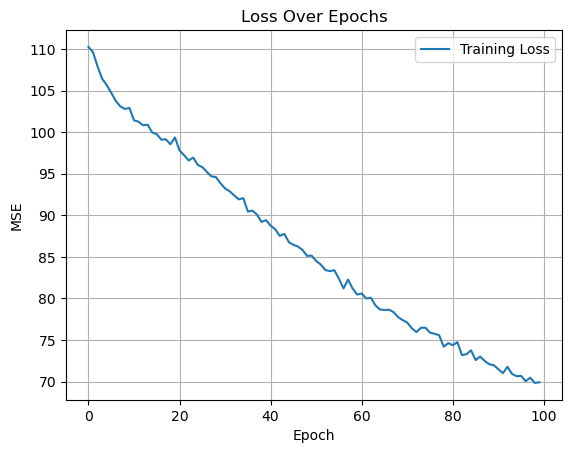

In [35]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

Analyzing the test accuracy

In [36]:
# Confirming the shapes of the training and testing data
X_test_time, X_test_static, y_test, _, _ = split_dynamic_static_inputs(test_data, sequence_length, static_cols=static_cols)
y_test_delta = transform_delta_from_last(X_test_time, y_test)

# Printing training data shapes and testing data shapes
print(f"Training data shapes: X_time: {X_train_time.shape}, X_static: {X_train_static.shape}, y: {y_train_delta.shape}")
print(f"Testing data shapes: X_time: {X_test_time.shape}, X_static: {X_test_static.shape}, y: {y_test_delta.shape}")

Training data shapes: X_time: (59211, 60, 1), X_static: (59211, 47), y: (59211, 6)
Testing data shapes: X_time: (13267, 60, 1), X_static: (13267, 47), y: (13267, 6)


In [37]:
# Summarizing validation accuracy
y_pred = model.predict([X_test_time, X_test_static])
y_pred = inverse_transform_delta_from_last(X_test_time, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE of test data:", mae)
print("RMSE of test data:", mse**0.5)
print("R2 of test data:", r2)

415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE of test data: 7.078151226043701
RMSE of test data: 11.036521970245293
R2 of test data: 0.786227285861969


Visualizing the prediction accuracy in plot form

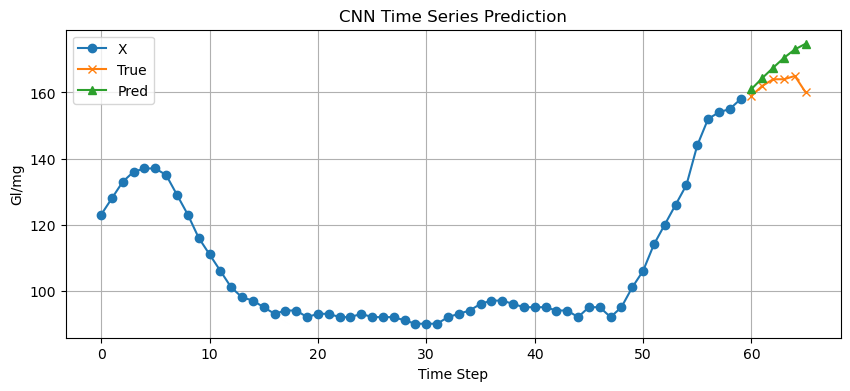

In [38]:
visualize_predictions(X_test_time, y_test, y_pred, index=15)

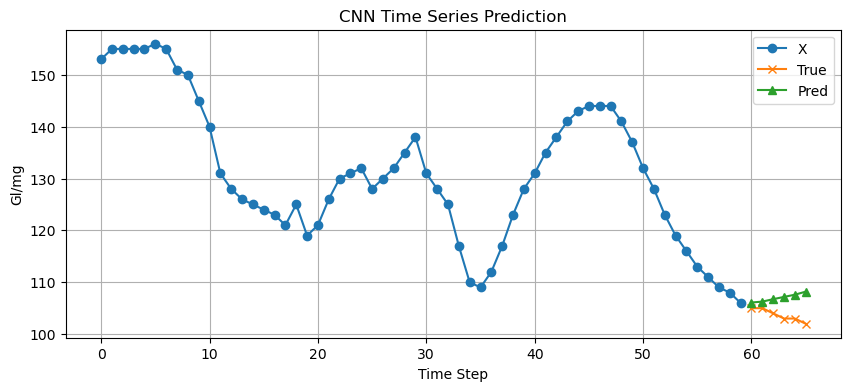

In [39]:
visualize_predictions(X_test_time, y_test, y_pred, index=500)

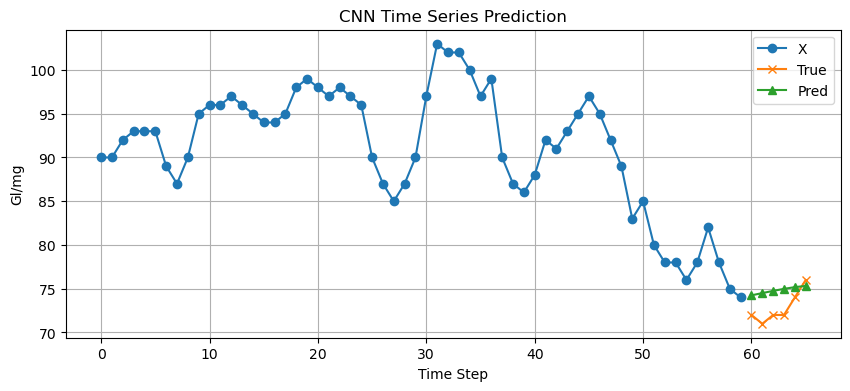

In [40]:
visualize_predictions(X_test_time, y_test, y_pred, index=1000)

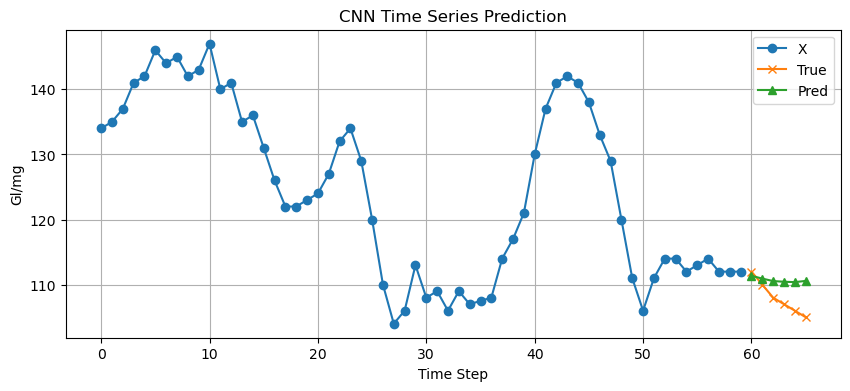

In [41]:
visualize_predictions(X_test_time, y_test, y_pred, index=3000)

In [42]:
# Saving model
model.save(f'cnn_volatility_RMSE102.keras')

## 5 Multi-Input Model with Tuned Hyperparameters
Below is a similar multi-input model like the one defined in section 4. However, this model is tuned using GridSearch and models are stored based on the training and validation metrics.

In [43]:
# Defining the function to build the model with hyperparameters
from sklearn.model_selection import GridSearchCV
from keras.layers import Lambda

def build_model(filters, kernel_size, pool_size, dense_units):
    time_series_input = Input(shape=(sequence_length, 1), name='time_input')
    x = Conv1D(filters, kernel_size=kernel_size, activation='relu')(time_series_input)
    x = MaxPooling1D(pool_size=pool_size)(x)
    x = GlobalMaxPooling1D()(x)

    static_input = Input(shape=(num_static_features,), name='static_input')
    s = Dense(dense_units, activation='relu')(static_input)
    
    merged = Concatenate()([x, s])
    out = Dense(256, activation='relu')(merged)
    out = Dense(256, activation='relu')(out)
    out = Dense(target_offset)(out)

    model = Model(inputs=[time_series_input, static_input], outputs=out)
    model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
    
    return model

In [44]:
# Getting the in-distribution test data
X_test_time_id, X_test_static_id, y_test_id, _, _ = split_dynamic_static_inputs(formatter.test_data[~formatter.test_data.index.isin(formatter.test_idx_ood)], sequence_length, static_cols=static_cols)

Below, we create a manual grid search for testing hyperparameters. A manual grid search was requried here, as the sklearn function isn't compatible with split input models.

In [48]:
from itertools import product
from tensorflow.keras.models import load_model
import json

# If best model is already saved, load it
try:
    best_test_model = load_model('best_validation_model.keras')
    best_test_params = json.load(open('best_validation_model_params.json', 'r'))
except:
    best_test_model = None
    best_test_params = None

if best_test_model is None:
    # Define hyperparameter grid
    param_grid = {
        "model__filters": [32, 64],
        "model__kernel_size": [3, 5, 7],
        "model__pool_size": [2, 3],
        "model__dense_units": [64, 128],
        "batch_size": [16, 32, 64],
        "epochs": [30]
    }

    # Track best config
    best_train_model = None
    best_train_loss = float('inf')
    best_train_params = None

    best_test_loss = float('inf')
    best_test_model = None
    best_test_params = None

    best_id_test_loss = float('inf')
    best_id_test_model = None
    best_id_test_params = None

    best_avg_loss = float('inf')
    best_avg_model = None
    best_avg_params = None

    # Loop through all hyperparameter combinations
    i = 0
    num_combinations = np.prod([len(v) for v in param_grid.values()])
    for filters, kernel_size, pool_size, dense_units, batch_size, epochs in product(*param_grid.values()):
        i += 1
        print(f"After iteration {i}/{num_combinations}")
        print(f"Training with filters={filters}, kernel_size={kernel_size}, pool_size={pool_size}, dense_units={dense_units}, batch_size={batch_size}")

        # Build model
        model = build_model(filters, kernel_size, pool_size, dense_units)
        model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
        history = model.fit([X_train_time, X_train_static], y_train_delta, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)

        val_loss = history.history['val_loss'][-1]

        # Track best model
        # training data
        if val_loss < best_train_loss:
            best_train_loss = val_loss
            best_train_model = model
            best_train_params = {
                'filters': filters,
                'kernel_size': kernel_size,
                'pool_size': pool_size,
                'dense_units': dense_units,
                'batch_size': batch_size,
                'epochs': epochs
            }

        # out of distribution test data
        y_pred = model.predict([X_test_time, X_test_static], verbose=0)
        y_pred = inverse_transform_delta_from_last(X_test_time, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        if mse < best_test_loss:
            best_test_loss = mse
            best_test_model = model
            best_test_params = {
                'filters': filters,
                'kernel_size': kernel_size,
                'pool_size': pool_size,
                'dense_units': dense_units,
                'batch_size': batch_size,
                'epochs': epochs
            }

        # in distributino test data
        y_pred_id = model.predict([X_test_time_id, X_test_static_id], verbose=0)
        y_pred_id = inverse_transform_delta_from_last(X_test_time_id, y_pred_id)
        id_mse = mean_squared_error(y_test_id, y_pred_id)
        if id_mse < best_id_test_loss:
            best_id_test_loss = id_mse
            best_id_test_model = model
            best_id_test_params = {
                'filters': filters,
                'kernel_size': kernel_size,
                'pool_size': pool_size,
                'dense_units': dense_units,
                'batch_size': batch_size,
                'epochs': epochs
            }

        # average loss among all test sets
        avg_loss = (mse + id_mse + val_loss) / 3
        if avg_loss < best_avg_loss:
            best_avg_loss = avg_loss
            best_avg_model = model
            best_avg_params = {
                'filters': filters,
                'kernel_size': kernel_size,
                'pool_size': pool_size,
                'dense_units': dense_units,
                'batch_size': batch_size,
                'epochs': epochs
            }

        print(f"Train (RMSE): {best_train_loss**0.5}\t OOD Test (RMSE): {best_test_loss**0.5}\t ID Test (RMSE): {best_id_test_loss**0.5}\t Avg (RMSE): {best_avg_loss**0.5}")
        print()


After iteration 1/72
Training with filters=32, kernel_size=3, pool_size=2, dense_units=64, batch_size=16
Train (RMSE): 9.305648023863947	 OOD Test (RMSE): 10.162026602404106	 ID Test (RMSE): 10.162026602404106	 Avg (RMSE): 9.88481418607992

After iteration 2/72
Training with filters=32, kernel_size=3, pool_size=2, dense_units=64, batch_size=32
Train (RMSE): 9.235028910196652	 OOD Test (RMSE): 9.987398600153087	 ID Test (RMSE): 9.987398600153087	 Avg (RMSE): 9.743066262199795

After iteration 3/72
Training with filters=32, kernel_size=3, pool_size=2, dense_units=64, batch_size=64
Train (RMSE): 9.235028910196652	 OOD Test (RMSE): 9.987398600153087	 ID Test (RMSE): 9.987398600153087	 Avg (RMSE): 9.743066262199795

After iteration 4/72
Training with filters=32, kernel_size=3, pool_size=2, dense_units=128, batch_size=16
Train (RMSE): 9.235028910196652	 OOD Test (RMSE): 9.987398600153087	 ID Test (RMSE): 9.987398600153087	 Avg (RMSE): 9.743066262199795

After iteration 5/72
Training with fil

In [49]:
# Printing best results
print("\nBest Testing Parameters:")
print(best_test_params, "\n")
print(f"Best Testing Loss (RMSE): {best_test_loss**0.5}")


Best Testing Parameters:
{'filters': 64, 'kernel_size': 5, 'pool_size': 3, 'dense_units': 64, 'batch_size': 32, 'epochs': 30} 

Best Testing Loss (RMSE): 9.870781878853485


In [50]:
# Getting the in-distribution test RMSE
y_pred = best_test_model.predict([X_test_time, X_test_static], verbose=0)
mean_squared_error(y_test_delta, y_pred)**0.5

9.870781878853485

In [51]:
# Getting the in-distribution test MAE
mean_absolute_error(y_test_delta, y_pred)

6.174745082855225

In [52]:
#Saving the best model
best_test_model.save(f'best_validation_model.keras')

# Saving the best model parameters
with open('best_validation_model_params.json', 'w') as f:
    json.dump(best_test_params, f)

### 5.1 Rebuilding the with GridSearch Hyperparameters
Below we rebuild the model using hyperparameters specified by gridsearch and train on a slighlty increased number of epochs.

In [55]:
# Retraining the final model with the best hyperparameters
final_model = build_model(filters=best_test_params['filters'],
                         kernel_size=best_test_params['kernel_size'],
                         pool_size=best_test_params['pool_size'],
                         dense_units=best_test_params['dense_units']
                         )
history = model.fit([X_train_time, X_train_static], y_train_delta, 
                    epochs=best_test_params['epochs'], 
                    batch_size=best_test_params['batch_size'], 
                    verbose=1)

Epoch 1/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 93.8844 - mae: 6.2361 - mse: 93.8844
Epoch 2/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 94.4793 - mae: 6.2683 - mse: 94.4793
Epoch 3/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 92.8934 - mae: 6.2348 - mse: 92.8934
Epoch 4/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 93.2589 - mae: 6.2351 - mse: 93.2589
Epoch 5/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 91.5474 - mae: 6.2008 - mse: 91.5474
Epoch 6/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 91.3311 - mae: 6.1955 - mse: 91.3311
Epoch 7/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 92.4011 - mae: 6.2391 - mse: 92.4011
Epoch 8/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 91.3855 - mae: 6.1894 - mse: 91.3855
Epoch 9/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 91.4706 - mae: 6.2118 - mse: 91.4706
Epoch 10/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 91.6963 - mae: 6.2010 - mse: 91.6963
Epoch 11/

In [56]:
# Getting the in-distribution test RMSE of the retrained model
y_pred = model.predict([X_test_time, X_test_static], verbose=0)
mean_squared_error(y_test_delta, y_pred)**0.5

10.64343995265999

In [57]:
# Getting the in-distribution test MAE of the retrained model
mean_absolute_error(y_test_delta, y_pred)

6.746351718902588

## 6 Summary and Results
The CNN model struggled to perform better than the baseline 0 prediction model (naïve persistance model). Using the grid search, a better CNN model was created, however, when retrained on the hyperparameters, the model became quickly overfitted and less accurate on the validation set. This indicates that the validation accuracy is highly dependent on the initialization of the model. 